In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from textwrap import wrap

%matplotlib inline
%run cleaning_demo.ipynb
# %run cleaning_web_data.ipynb
# %run cleaning_experiment_clients.ipynb

df_demo = import_df_demo() # type: ignore
# df_web_data = import_df_web_data() # type: ignore
# df_experiment_clients = import_df_experiment_clients() # type: ignore


6
DataFrame successfully saved to ../data/clean/df_demo_clean.csv


In [22]:
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,tenure,age_group,bal_category_3,bal_category_2
0,836976,6,73,61,U,2,45105.30,6,9,New Client,Senior,Low,Low
1,2304905,7,94,58,U,2,110860.30,6,9,Long Standing Client,Senior,Medium,High
2,1439522,5,64,32,U,2,52467.79,6,9,New Client,Adults,Low,Low
3,1562045,16,198,49,M,2,67454.65,3,6,Long Standing Client,Adults,Low,Low
4,5126305,12,145,33,F,2,103671.75,0,3,Long Standing Client,Adults,Medium,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,39,U,3,1411062.68,5,5,New Client,Adults,High,High
70605,8981690,12,148,31,M,2,101867.07,6,6,Long Standing Client,Adults,Medium,High
70606,333913,16,198,62,F,2,40745.00,3,3,Long Standing Client,Senior,Low,Low
70607,1573142,21,255,68,M,3,475114.69,4,4,Long Standing Client,Senior,Medium,High


In [23]:
# Numerical Columns
df_numerical = df_demo[["clnt_tenure_yr", "clnt_tenure_mnth", "clnt_age", "num_accts", "bal", "calls_6_mnth", "logons_6_mnth"]]
df_numerical

,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
0,6,73,61,2,45105.30,6,9
1,7,94,58,2,110860.30,6,9
2,5,64,32,2,52467.79,6,9
3,16,198,49,2,67454.65,3,6
4,12,145,33,2,103671.75,0,3
...,...,...,...,...,...,...,...
70604,4,56,39,3,1411062.68,5,5
70605,12,148,31,2,101867.07,6,6
70606,16,198,62,2,40745.00,3,3
70607,21,255,68,3,475114.69,4,4


In [24]:
df_numerical.describe()

,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,70081.000000,70081.000000,70081.000000,70081.000000,7.008100e+04,70081.000000,70081.000000
mean,11.948845,149.415904,46.881352,2.255148,1.479403e+05,3.382015,5.569641
std,6.765241,80.816791,15.496608,0.534734,3.023851e+05,2.237282,2.353233
min,2.000000,33.000000,14.000000,1.000000,1.378942e+04,0.000000,1.000000
25%,6.000000,81.000000,33.000000,2.000000,3.745437e+04,1.000000,4.000000
50%,11.000000,135.000000,48.000000,2.000000,6.355371e+04,3.000000,5.000000
75%,15.000000,191.000000,59.000000,2.000000,1.380282e+05,6.000000,7.000000
max,55.000000,669.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


## Gender Analysis

In [25]:
def multiple_value_counts(df, list):
    for serie in list:
        # Frequency table for 'MSZoning'
        frequency_table = df[serie].value_counts()

        # Calculating the proportion of each unique value in the 'MSZoning'
        proportion_table = df[serie].value_counts(normalize=True)

        return frequency_table, proportion_table

multiple_value_counts(df_demo, ["gendr"])

(gendr
 U    24082
 M    23469
 F    22527
 X        3
 Name: count, dtype: int64,
 gendr
 U    0.343631
 M    0.334884
 F    0.321442
 X    0.000043
 Name: proportion, dtype: float64)

In [26]:
multiple_value_counts(df_demo[df_demo["bal"] > 1000000], ["gendr"])


(gendr
 M    806
 F    254
 U    117
 Name: count, dtype: int64,
 gendr
 M    0.684792
 F    0.215803
 U    0.099405
 Name: proportion, dtype: float64)

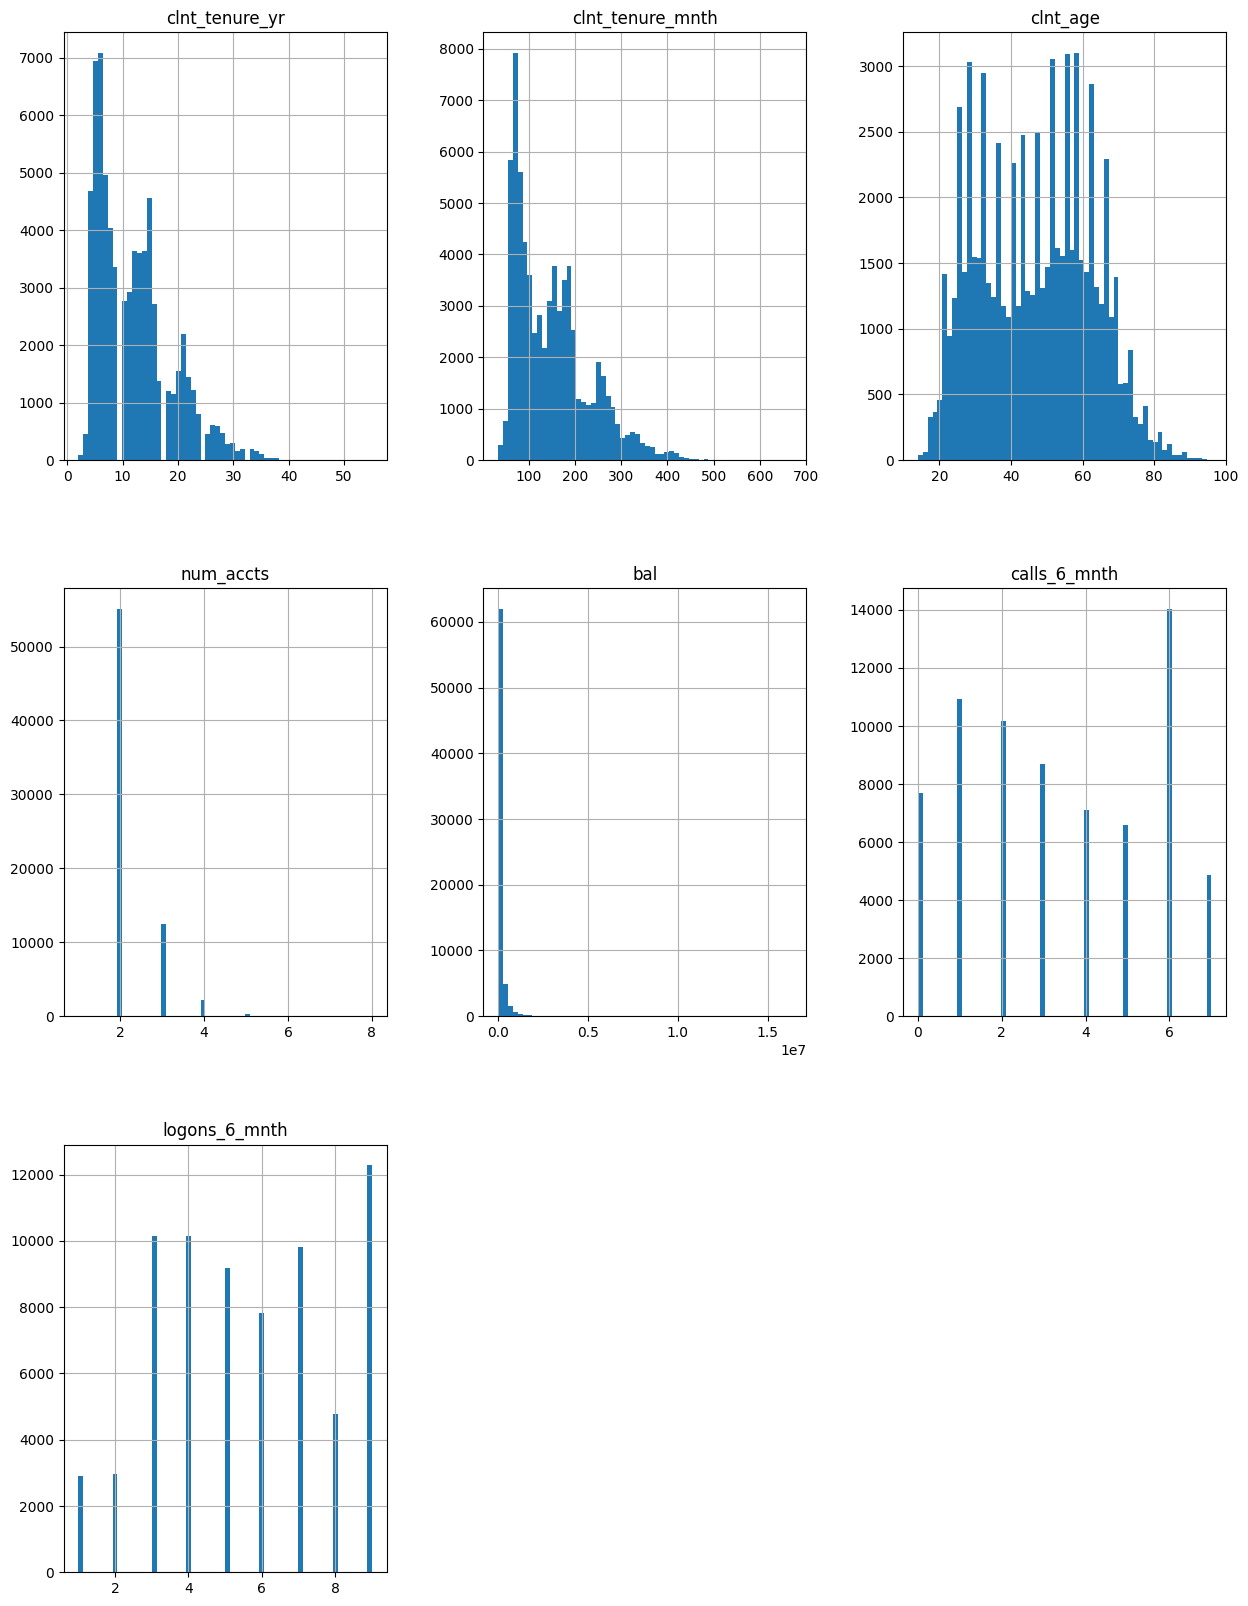

In [27]:
# Creating histograms for each numerical column in 'df_numerical'
df_numerical.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)
plt.show()

## Balance Analysis

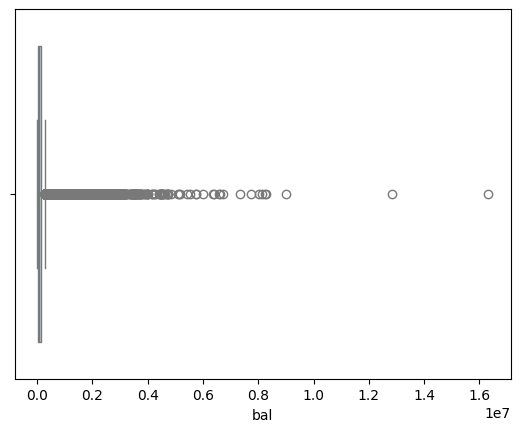

In [28]:
# Plotting a boxplot for the 'SalePrice' column with a light blue color
sns.boxplot(x = df_demo["bal"], color="lightblue")
plt.show()

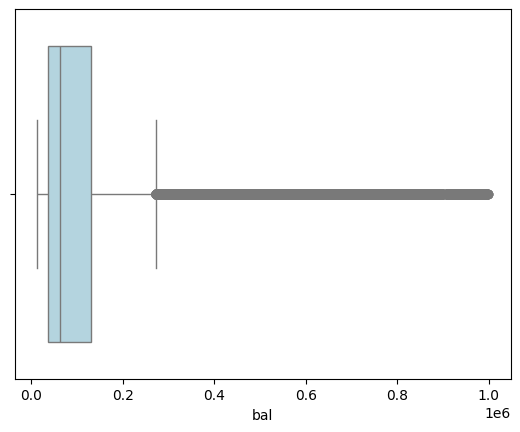

In [29]:
df_demo_test_boxplot = df_demo[df_demo["bal"] < 1000000]

sns.boxplot(x = df_demo_test_boxplot["bal"], color="lightblue")
plt.show()

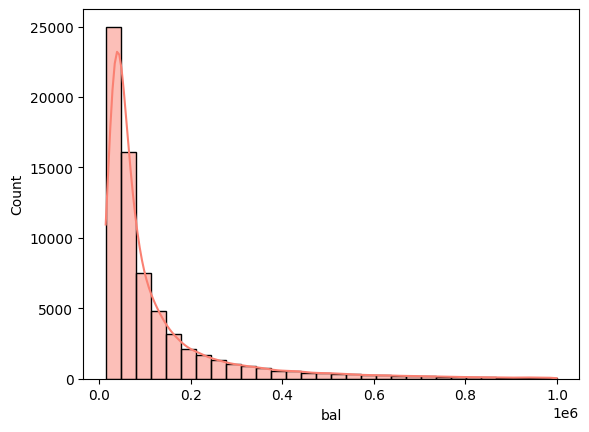

In [30]:
sns.histplot(df_demo[df_demo["bal"] < 1000000]["bal"], kde=True, bins=30, color="salmon")
plt.show()

In [31]:
df_demo[df_demo["bal"] < 1000000]["bal"].describe()

count     68904.000000
mean     119205.604347
std      146791.120297
min       13789.420000
25%       37136.190000
50%       62256.290000
75%      131178.655000
max      999154.490000
Name: bal, dtype: float64

In [32]:
# Full Balance Stats
df_demo["bal"].describe()

count    7.008100e+04
mean     1.479403e+05
std      3.023851e+05
min      1.378942e+04
25%      3.745437e+04
50%      6.355371e+04
75%      1.380282e+05
max      1.632004e+07
Name: bal, dtype: float64

In [33]:
full_balance = df_demo["bal"].sum()
print(full_balance)

10367803508.66


In [34]:
top_mill = df_demo[df_demo["bal"] > 1000000]["bal"].sum()
top_mill

np.float64(2154060546.7)

In [35]:
medium_group_bal = df_demo[(100000 < df_demo["bal"]) & (df_demo["bal"] < 1000000)]["bal"].sum()
medium_group_bal

np.float64(5965156441.34)

In [36]:
low_group_bal = df_demo[100000 > df_demo["bal"]]["bal"].sum()
low_group_bal

np.float64(2248586520.62)

In [37]:
proportion_balance_high = top_mill / full_balance
print(proportion_balance_high)

proportion_balance_medium = medium_group_bal / full_balance
print(proportion_balance_medium)

proportion_balance_low = low_group_bal / full_balance
print(proportion_balance_low)

0.2077644068872216
0.5753539249039042
0.2168816682088742


## Exporting Dataframes

In [ ]:
# create a dummy function to export dataframe directly
def import_df_explore_demo():
    return (
       #
        )